In [1]:
#import necessary packages
import pandas as pd
import numpy as nm

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

#Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)

# 1) Data Cleaning

In [3]:
#load the data
df = pd.read_csv('gb_restaurant_project_data.csv')

## Step 1: Explore the data

In [5]:
#counting the rows and columns
df.shape

(1000, 8)

In [6]:
#displaying the first five rows
df.head()

,CustomerID,Total_Bill_Amt,Tip_Amount_UGX,Gender_Cat,Location_City,Meal_Type,Visit_Date,Party_Size
0,CUST001,254831310.17,14875556.00,Male,Gulu,NaN,2024-10-17,4
1,CUST002,185510701.50,10245458.00,Male,Kampala,Vegetarian,2024-02-10,8
2,CUST003,274812484.37,22485573.00,Male,Entebbe,Non-Vegetarian,2024-02-13,6
3,CUST004,425710547.44,36323236.00,Male,Mbarara,NaN,2024-09-05,3
4,CUST005,176826324.55,9120579.00,Female,Entebbe,Kids Meal,2024-02-05,4


In [7]:
#displaying the statistics of the numeric columns
df.describe()

,Total_Bill_Amt,Tip_Amount_UGX,Party_Size
count,950.00,950.00,1000.00
mean,221496816.04,16695712.86,7.00
std,124075399.63,10025874.07,11.22
min,5032493.80,122375.00,1.00
25%,140082807.60,9868580.00,3.00
50%,200629073.77,14781722.50,6.00
75%,272893294.04,21075122.50,8.00
max,1364591596.77,95441091.00,100.00


In [8]:
#finding rows with missing entries
df.isnull().sum()

CustomerID          0
Total_Bill_Amt     50
Tip_Amount_UGX     50
Gender_Cat          0
Location_City       0
Meal_Type         100
Visit_Date          0
Party_Size          0
dtype: int64

In [9]:
#checking column names
df.columns

Index(['CustomerID', 'Total_Bill_Amt', 'Tip_Amount_UGX', 'Gender_Cat',
       'Location_City', 'Meal_Type', 'Visit_Date', 'Party_Size'],
      dtype='object')

## Step 2: Clean the data

In [11]:
#standardising the column names
df.columns = df.columns.str.replace(r'[A-Z]', r'_\1').str.lower()
df.columns = df.columns.str.strip()

print ("Cleaned Column Names:")
print (df.columns.tolist())

Cleaned Column Names:
['customerid', 'total_bill_amt', 'tip_amount_ugx', 'gender_cat', 'location_city', 'meal_type', 'visit_date', 'party_size']


In [12]:
#attempting to change the way the customer id column name is written. to rename it
df = df.rename(columns = {'customerid' : 'customer_id'})

#seeing the results
print (df.columns.tolist())


['customer_id', 'total_bill_amt', 'tip_amount_ugx', 'gender_cat', 'location_city', 'meal_type', 'visit_date', 'party_size']


### Handling Missing Values

In [14]:
#missing values in meal type
df['meal_type'] = df['meal_type'].fillna('Unknown')

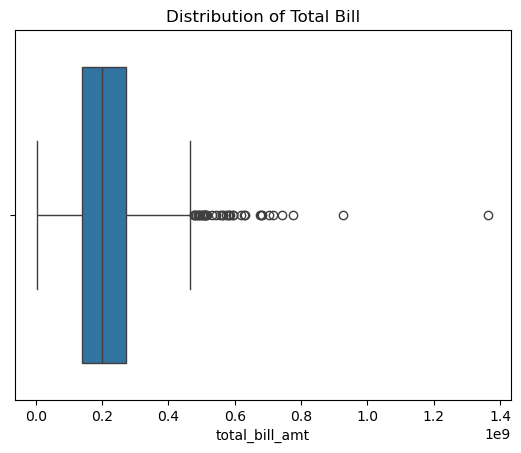

In [15]:
#checking for outliers in total bill amount
sns.boxplot(x = df['total_bill_amt'])
plt.title('Distribution of Total Bill')
plt.show()

In [16]:
#missing values in total bill amount
#df['total_bill_amt'] = df['total_bill_amt'].fillna(df['total_bill_amt'].median())

#we would use median to impute as the data is not evenly distributed.
#i will not be subsitituing the missing values with median as that may affect the end outcome and give a wrong image of actual earnings.

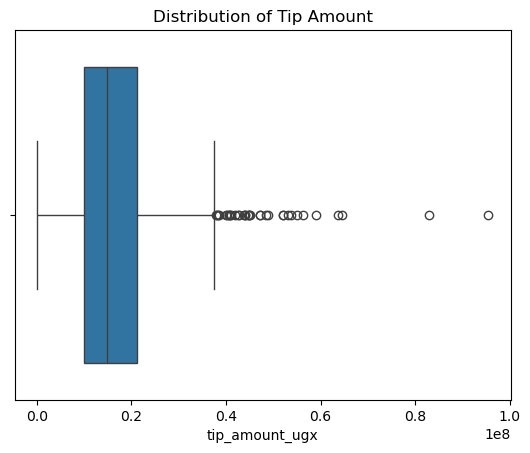

In [17]:
#checking distribution of data in tip amount
sns.boxplot(x = df['tip_amount_ugx'])
plt.title('Distribution of Tip Amount')
plt.show()

In [18]:
#missing values in tip amount
#df['tip_amount_ugx'] = df['tip_amount_ugx'].fillna(df['tip_amount_ugx'].median())

### Addressing outliers

In [20]:
#clipping outliers in total bill amount  tbd
#df[''].clip()

In [21]:
#clipping outliers in tip amoutnt tbd

In [22]:
print ('I did not clip any of the outliers as the outliers in the total bill amount and tip amount \nmay correspond with the outliers in the party size column. \nThis may be because the unusually big party sizes paid higher total bills and tip amounts.')

I did not clip any of the outliers as the outliers in the total bill amount and tip amount 
may correspond with the outliers in the party size column. 
This may be because the unusually big party sizes paid higher total bills and tip amounts.


### Standardising spellings within the columns

In [24]:
#standardising gender spellings
df['gender_cat'] = df['gender_cat'].str.title().replace({'M' : 'Male' , 'F' : 'Female'})
df['gender_cat'] = df['gender_cat'].str.lower()

print (df['gender_cat'].unique())

['male' 'female']


In [25]:
#standardising spellings of locations
df['location_city'] = df['location_city'].str.title().replace({'Kampalla' : 'Kampala'})

df['location_city'].unique()

array(['Gulu', 'Kampala', 'Entebbe', 'Mbarara', 'Arua'], dtype=object)

## Converting relevant columns to more suitable data types

In [27]:
df.dtypes

customer_id        object
total_bill_amt    float64
tip_amount_ugx    float64
gender_cat         object
location_city      object
meal_type          object
visit_date         object
party_size          int64
dtype: object

In [28]:
#converting visit date to datetime
df['visit_date'] = pd.to_datetime(df['visit_date'], errors = 'coerce')

In [29]:
#checking for duplicated rows
df.duplicated().sum()

0

In [30]:
df.head(15)

,customer_id,total_bill_amt,tip_amount_ugx,gender_cat,location_city,meal_type,visit_date,party_size
0,CUST001,254831310.17,14875556.00,male,Gulu,Unknown,2024-10-17,4
1,CUST002,185510701.50,10245458.00,male,Kampala,Vegetarian,2024-02-10,8
2,CUST003,274812484.37,22485573.00,male,Entebbe,Non-Vegetarian,2024-02-13,6
3,CUST004,425710547.44,36323236.00,male,Mbarara,Unknown,2024-09-05,3
4,CUST005,176826324.55,9120579.00,female,Entebbe,Kids Meal,2024-02-05,4
5,CUST006,176827776.11,17118805.00,female,Kampala,Special,2024-09-29,2
6,CUST007,437838941.28,23029700.00,female,Gulu,Non-Vegetarian,2024-03-05,1
7,CUST008,291768910.22,22485118.00,male,Entebbe,Non-Vegetarian,2024-03-06,8
8,CUST009,157198215.48,13433063.00,male,Kampala,Special,2024-12-03,1
9,CUST010,260740260.89,24391849.00,male,Entebbe,Kids Meal,2024-08-31,1


In [31]:
#save the cleaned data as a new csv file
cleaned_df = df.to_csv('cleaned_gb_restaurant_project_data.csv') 

print ('Cleaned data csv saved successfully!')

Cleaned data csv saved successfully!


# 2) Descriptive Statistics

In [33]:
#Calculating measures for numeric columns
df.describe()

,total_bill_amt,tip_amount_ugx,visit_date,party_size
count,950.00,950.00,950,1000.00
mean,221496816.04,16695712.86,2024-07-03 13:23:22.105263104,7.00
min,5032493.80,122375.00,2024-01-01 00:00:00,1.00
25%,140082807.60,9868580.00,2024-04-07 06:00:00,3.00
50%,200629073.77,14781722.50,2024-07-03 12:00:00,6.00
75%,272893294.04,21075122.50,2024-10-02 18:00:00,8.00
max,1364591596.77,95441091.00,2024-12-31 00:00:00,100.00
std,124075399.63,10025874.07,NaN,11.22


## Summarising categorical variables

In [35]:
#Categorical values for gender
freq = df['gender_cat'].value_counts()
percentage = df['gender_cat'].value_counts(normalize=True) * 100

print ("Frequency Counts:", freq)
print ('\nPercentages:', percentage)

Frequency Counts: gender_cat
male      507
female    493
Name: count, dtype: int64

Percentages: gender_cat
male     50.70
female   49.30
Name: proportion, dtype: float64


In [36]:
#Categorical values for location
loc_freq = df['location_city'].value_counts()
loc_percentage = df['location_city'].value_counts(normalize=True) * 100

print ('Frequency:', loc_freq )
print ('\nLocation Percentage:', loc_percentage)

Frequency: location_city
Kampala    349
Entebbe    201
Mbarara    152
Gulu       150
Arua       148
Name: count, dtype: int64

Location Percentage: location_city
Kampala   34.90
Entebbe   20.10
Mbarara   15.20
Gulu      15.00
Arua      14.80
Name: proportion, dtype: float64


In [37]:
#Categorical variables for Meal type
type_freq = df['meal_type'].value_counts()
type_percentage = df['meal_type'].value_counts(normalize=True) * 100

print ('Frequency by',type_freq)
print ('\nPercentage by', type_percentage,)

Frequency by meal_type
Non-Vegetarian    445
Special           182
Vegetarian        181
Unknown           100
Kids Meal          92
Name: count, dtype: int64

Percentage by meal_type
Non-Vegetarian   44.50
Special          18.20
Vegetarian       18.10
Unknown          10.00
Kids Meal         9.20
Name: proportion, dtype: float64


### Visualise distributions

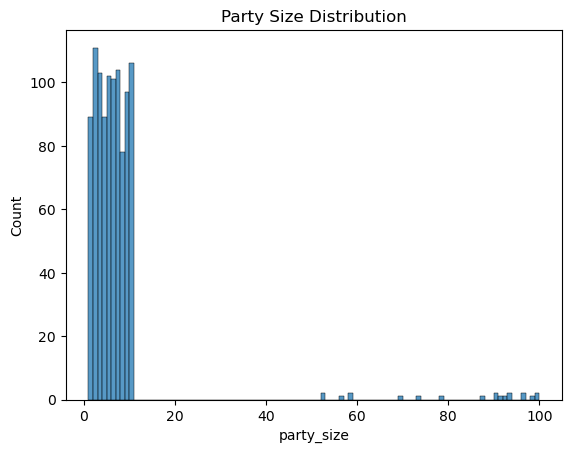

In [39]:
#Party size distribution
sns.histplot(x = df['party_size'])
plt.title('Party Size Distribution')
plt.show()

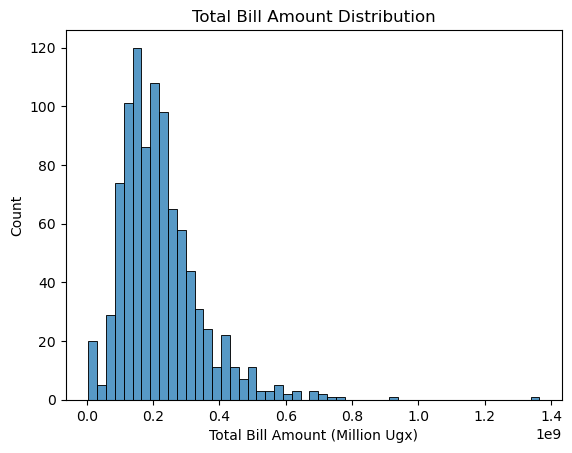

In [40]:
#total bill distribution
sns.histplot(x = df['total_bill_amt'])
plt.title('Total Bill Amount Distribution')
plt.xlabel('Total Bill Amount (Million Ugx)')
plt.show()

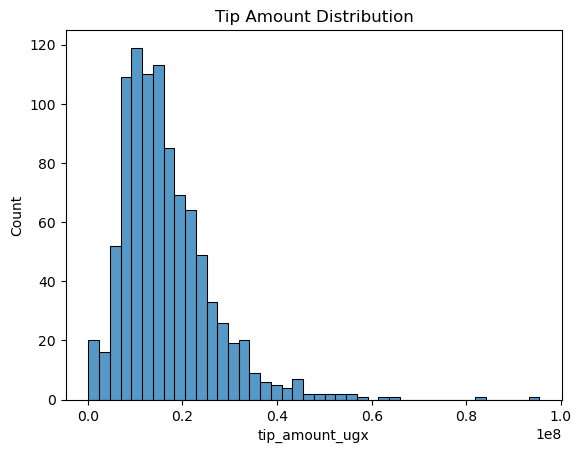

In [41]:
#tip amount distribution
sns.histplot(x = df['tip_amount_ugx'])
plt.title('Tip Amount Distribution')
plt.show()

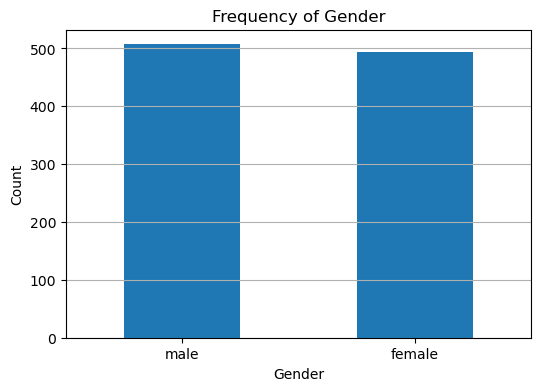

In [114]:
#gender distribution
df['gender_cat'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [43]:
#gender category distribution
#sns.barplot(x = df['gender_cat'])
#plt.title('Gender Category Distribution')
#plt.show()

In [44]:
#meal type distribution
#sns.heatmap(x = df['meal_type'])
#plt.title('Meal Type Distribution')
#plt.show()

In [45]:
#Location city distribution
#sns.barplot(x = df['location_city'])
#plt.title('Location City Distribution')
#plt.show()

#need to add frequency

In [46]:
#chart 

## Cross Tabulations and Groupby

### Cross-tabs

In [49]:
#Gender vs Locations cross-tab
gender_by_location = pd.crosstab(
    index = df['location_city'],
    columns = df['gender_cat'],
    margins= True
)

print ('Cross Tabulation of gender by location:')
print (gender_by_location.sort_values(by='All', ascending=False))

Cross Tabulation of gender by location:
gender_cat     female  male   All
location_city                    
All               493   507  1000
Kampala           181   168   349
Entebbe            94   107   201
Mbarara            72    80   152
Gulu               63    87   150
Arua               83    65   148


In [50]:
#Cross-tab of Meal Type vs Location
mealtype_by_location = pd.crosstab(
    index = df['location_city'],
    columns = df['meal_type'],
    margins = True
)

print ('Cross Tabulation of Meal Type vs Location')
print (mealtype_by_location.sort_values(by='All', ascending=False))

Cross Tabulation of Meal Type vs Location
meal_type      Kids Meal  Non-Vegetarian  Special  Unknown  Vegetarian   All
location_city                                                               
All                   92             445      182      100         181  1000
Kampala               28             152       71       29          69   349
Entebbe               24              93       32       19          33   201
Mbarara               10              76       20       24          22   152
Gulu                  16              62       33       12          27   150
Arua                  14              62       26       16          30   148


### Groupby

In [52]:
#Groupby Location and Gender to calculate average total bill mount
avg_bill = df.groupby(['location_city', 'gender_cat'])['total_bill_amt'].mean().unstack()

print ('Average total bill amount by location and gender: \n')
print (avg_bill)

Average total bill amount by location and gender: 

gender_cat          female         male
location_city                          
Arua          227887233.80 211797213.24
Entebbe       207674354.05 214714890.54
Gulu          246942487.89 248318499.04
Kampala       217615439.06 223410876.66
Mbarara       220882581.99 206169964.02


In [53]:
#Groupby location and gender to calculate average tip amount
avg_tip = df.groupby(['location_city', 'gender_cat'])['tip_amount_ugx'].mean().unstack()

print ('Average tip amount by gender and location: \n')
print (avg_tip)

Average tip amount by gender and location: 

gender_cat         female        male
location_city                        
Arua          17637541.81 15532289.95
Entebbe       15953832.41 16117414.10
Gulu          18727100.64 18497138.00
Kampala       16126864.45 17064815.58
Mbarara       15840259.43 16161554.28


### Viualising

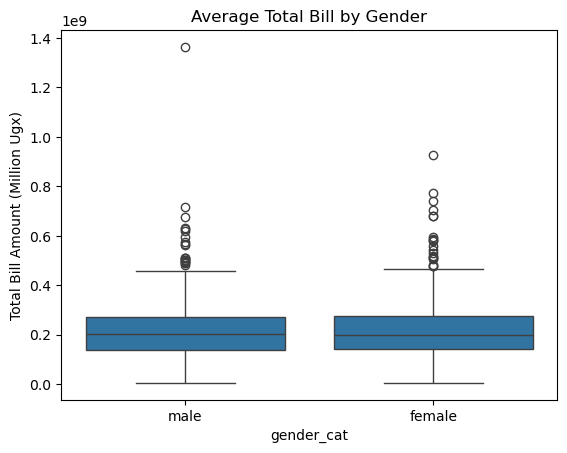

In [55]:
#average total bill grouped by gender
sns.boxplot(x = 'gender_cat', y = 'total_bill_amt', data = df )
plt.title('Average Total Bill by Gender')
plt.ylabel('Total Bill Amount (Million Ugx)')
plt.show()

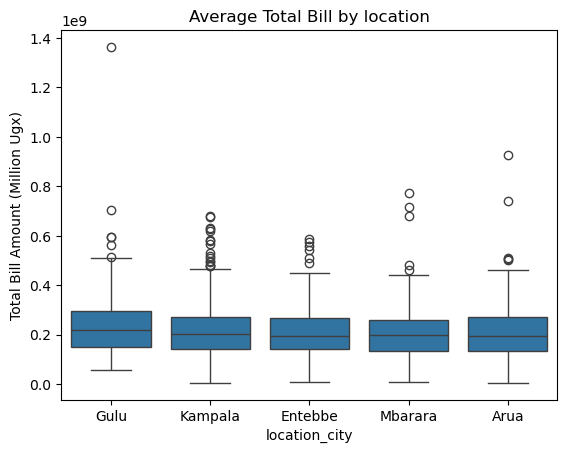

In [56]:
#average total bill grouped by location
sns.boxplot(x = 'location_city', y = 'total_bill_amt', data = df )
plt.title('Average Total Bill by location')
plt.ylabel('Total Bill Amount (Million Ugx)')
plt.show()

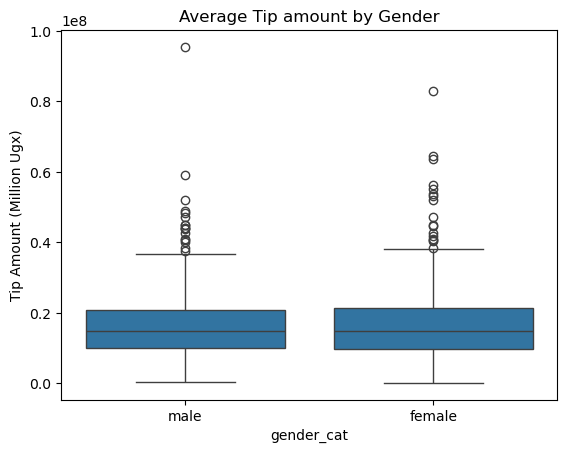

In [57]:
#average tip amount grouped by gender
sns.boxplot(x = 'gender_cat', y = 'tip_amount_ugx', data = df)
plt.title('Average Tip amount by Gender')
plt.ylabel('Tip Amount (Million Ugx)')
plt.show()

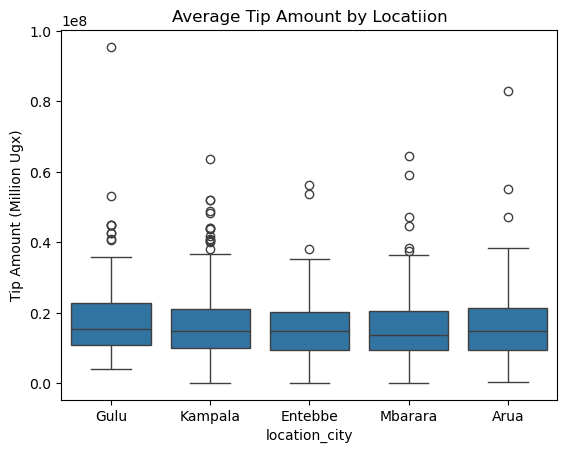

In [58]:
#average tip amount gropued by location
sns.boxplot(x = 'location_city', y = 'tip_amount_ugx', data = df )
plt.title('Average Tip Amount by Locatiion')
plt.ylabel('Tip Amount (Million Ugx)')
plt.show()

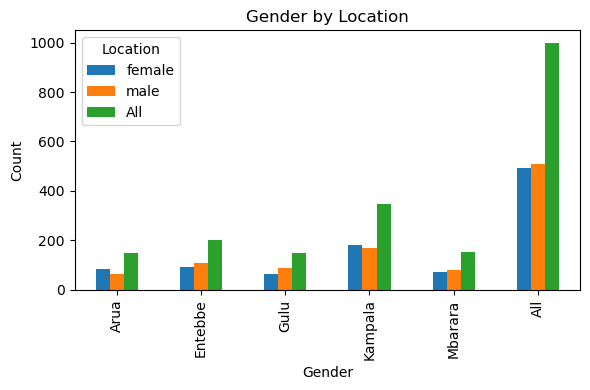

In [59]:
#gender_by_location = gender_by_location.drop('All')
gender_by_location.plot(kind= 'bar', figsize= (6, 4))
plt.title('Gender by Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Location')
#plt.bar_label()
plt.tight_layout()
plt.show()

## Hypothesis Testing

In [61]:
#Testing if average total bill equals 200,000 UGX

#load the cleaned data set
df = pd.read_csv('cleaned_gb_restaurant_project_data.csv')
df_clean = df.dropna(subset = ['total_bill_amt']) 

#testing for normality
norm = stats.shapiro(df_clean['total_bill_amt'])
print (norm)

#carrying out a 1 sample t-test
t_stat, t_p = stats.ttest_1samp(df_clean['total_bill_amt'], popmean=200000)
print (f'\n1-Sample T-Test for total bill amount (mean vs 200,000): Statistic={t_stat:.4f}, \np-value={t_p:.4f}')

#carrying out a one sample Wilcoxon signed rank test
w_stat, w_p = stats.wilcoxon(df_clean['total_bill_amt'] - 200000)
print (f'\nOne-Sample Wilcoxon Test for total bill amount (median vs 200,000): \nStatistic={w_stat:.10f}, p-value={w_p:.4f}')

print ('\nThe p-value is less than 0.05 so the data is not normally distributed. \nHence we are going to consider the results of the Wilcoxon test. \nThe p-value from the wilcoxon test is less than 0.05 so we reject the null hypothesis.')

ShapiroResult(statistic=0.8755320418237221, pvalue=7.280303182056858e-27)

1-Sample T-Test for total bill amount (mean vs 200,000): Statistic=54.9732, 
p-value=0.0000

One-Sample Wilcoxon Test for total bill amount (median vs 200,000): 
Statistic=0.0000000000, p-value=0.0000

The p-value is less than 0.05 so the data is not normally distributed. 
Hence we are going to consider the results of the Wilcoxon test. 
The p-value from the wilcoxon test is less than 0.05 so we reject the null hypothesis.


In [62]:
#Using paired t-test to compare total bill vs tip amount 

#clean the data
df_clean = df.dropna(subset= ['total_bill_amt', 'tip_amount_ugx'])

#Paired sample t-test
t_stat, t_p = stats.ttest_rel(df_clean['total_bill_amt'], df_clean['tip_amount_ugx'])
